# All material ©2019, Alex Siegman

---

### {quote on data viz}

### There are a lot of different tools for data visualization in Python. 

### {Matplotlib} 
### {Seaborn} 
### {Numpy}

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv("SternTech_UserData.csv")

In [4]:
data.head()

,Unnamed: 0,id,company_size,age,sex,clicked_on_ad,ad_type,location,timestamp
0,0,081217b4-1cf5-4657-8287-6db1b75462e4,large,92,M,Yes,Business,MidWest,2018-08-26 06:00:27.124290
1,1,d0b45a01-b73d-4f8e-bfa8-c53ea75397f1,large,56,M,Yes,Culinary,SouthWest,2011-06-01 18:54:34.815634
2,2,1dc2e636-e19b-4d42-b228-df09cd009acb,large,20,F,No,Business,SouthEast,2013-07-16 00:24:47.888180
3,3,5d09d6d4-023e-4fa1-9559-89526679e885,large,55,F,Yes,Political,NorthWest,2010-06-25 12:13:51.369878
4,4,b69e54e3-fc89-4c0f-8bdb-280409db173e,medium,25,N,No,Tech,US,2010-09-22 07:53:12.454909


In [5]:
data = data.drop(data.columns[[0]],axis=1)

### Pandas has a built in .plotI() function, with lots of parameters:

https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

### Barplots 

In [6]:
size_click = pd.crosstab(data['company_size'],data['clicked_on_ad'],margins=True,margins_name='Total')
size_click

clicked_on_ad,No,Yes,Total
company_size,,,
large,6196,6291,12487
medium,6359,6278,12637
small,6165,6216,12381
startup,6280,6215,12495
Total,25000,25000,50000


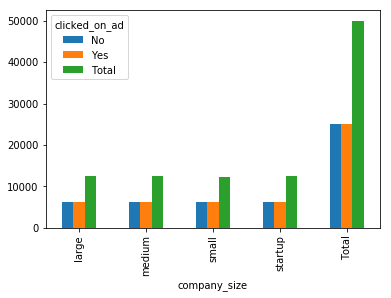

In [7]:
size_click.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a7b3c50>,
      dtype=object)

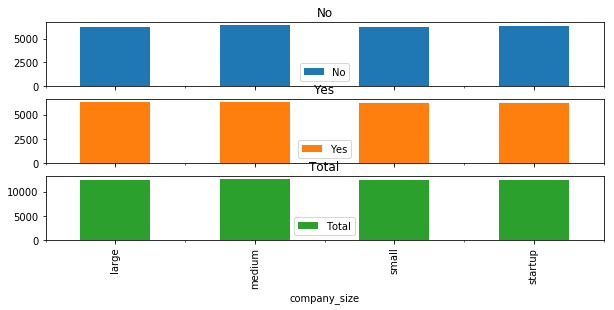

In [26]:
size_click[:4].plot(kind='bar',subplots=True,figsize=(10,4))

In [9]:
location_sex = pd.crosstab(data['location'],data['sex'],margins=True,margins_name='Total')
location_sex

sex,F,M,N,Total
location,,,,
Canada,1826,1912,1911,5649
Mexico,1807,1781,1885,5473
MidWest,1891,1850,1891,5632
NorthEast,1794,1916,1863,5573
NorthWest,1876,1929,1925,5730
SouthAmerica,1926,1820,1850,5596
SouthEast,1840,1826,1834,5500
SouthWest,1803,1796,1856,5455
US,1817,1778,1797,5392


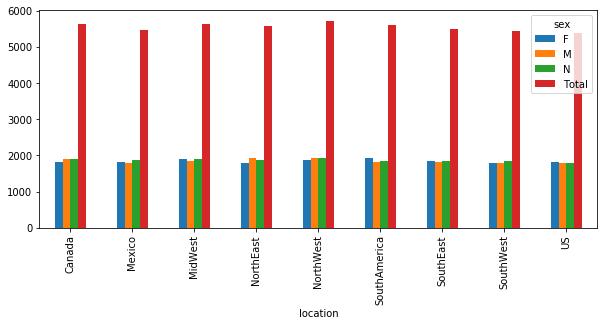

In [10]:
location_sex[:9].plot(kind='bar',figsize=(10,4))

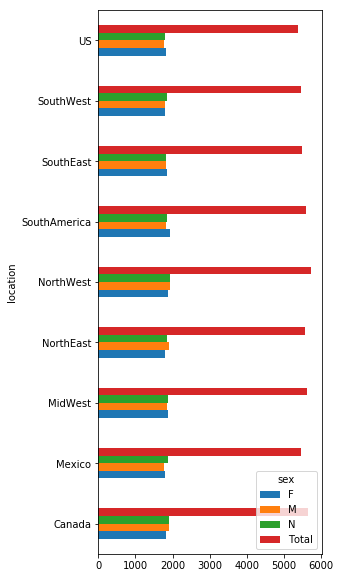

In [11]:
location_sex[:9].plot(kind='barh',figsize=(4,10))

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12693b6a0>,
      dtype=object)

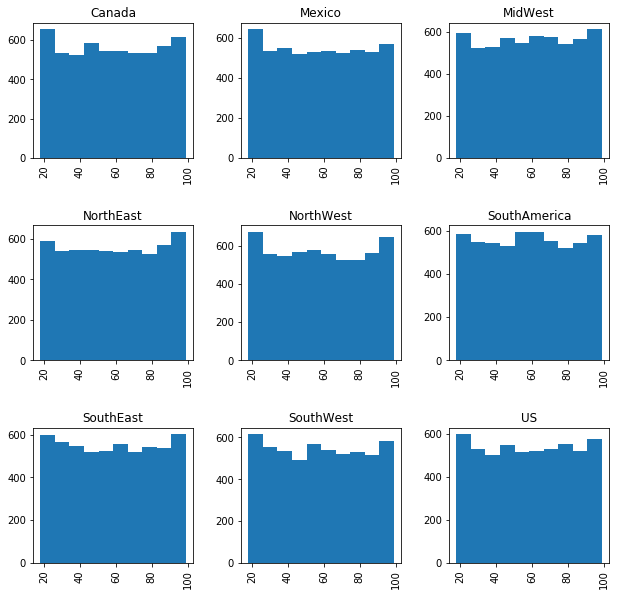

In [38]:
data['age'].hist(by=data['location'],figsize=(10,10))

In [13]:
# data['sex'].hist()

In [15]:
# data['age'].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0)

In [111]:
# data['timestamp'] = pd.to_datetime(data['timestamp'],infer_datetime_format=True)
# data['timestamp'].map(lambda d: d.month).plot(kind='hist')

### Density Plot

### Boxplot

### Scatterplot

### Hexagonal Bin Plot

### Trellis Plot

### Heatmaps

In [ ]:
# size_sex_click = pd.crosstab(data.clicked_on_ad,[data.company_size,data.sex],margins=True,margins_name='Total')
# size_sex_click